In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [112]:
#Reading the csv source file
loans_data = pd.read_csv("loan.csv",low_memory=False )

In [113]:
# This is to see all the columns name
pd.set_option('display.max_columns', None)
loans_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [44]:
loans_data.shape

(39717, 111)

Business Objective:-  To find the applicants which have strong probability of defaulting

We have to find the column whih will be usefull in achiving the business objective. From the dataset,
we dont need all the columns. Below are the list of columns which will help us to achive the objective.


In [45]:
column_list = ['emp_title ',
'emp_length',
'home_ownership',
'annual_inc',
'verification_status',
'addr_state',
'purpose',
'loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'int_rate',
'loan_status',
'grade',
'sub_grade',
'dti',
'issue_d',
'term',
'installment'
];

column_removal_list = [x for x in loans_data.columns if x not in column_list]
#column_removal_list
for col in column_removal_list:
    loans_data = loans_data.drop(col, axis=1)

In [46]:
loans_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94


Loan status should be Fully paid or charged off. Remove other values.

In [47]:
loans_data = loans_data[loans_data.loan_status != 'Current']
loans_data.shape

(38577, 17)

In [48]:
#Check if there are any other values in loan_status
loans_data.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

Employee Length - We will fetch numeric value from employee length variable
                  and use this value for our analysis.

In [49]:
#Extracting integer from String. For Employee length
loans_data['emp_length'] = loans_data['emp_length'].apply(lambda x : ("".join(filter(str.isdigit, str(x)))))

In [50]:
loans_data.emp_length.value_counts()

emp_length
10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
      1033
Name: count, dtype: int64

In [51]:
#Filter the records having emp_length as null
loans_data = loans_data[loans_data['emp_length']!='']

In [52]:
#Check for any null value in emp_length
loans_data.emp_length.value_counts()

emp_length
10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64

In [53]:
#Calculate ratio of loan to annual income
loans_data['l_to_an'] = round(loans_data['loan_amnt']/loans_data['annual_inc'],2)

In [54]:
#Derive loan issue year
loans_data['issue_year'] = loans_data['issue_d'].apply(lambda x : datetime.datetime.strptime(x, '%b-%y').year)

In [55]:
loans_data.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,l_to_an,issue_year
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.21,2011
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.08,2011
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.20,2011
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.20,2011
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.14,2011


In [56]:
#reset the index back to the default
loans_data = loans_data.reset_index(drop=True)
round(100*(loans_data.isnull().sum()/len(loans_data.index)), 2)
loans_data.shape

(37544, 19)

Now we have to create various graph to understand the relationship.
1> Graph for average default and fully paid loans.
2> Graph to understand the loans issued each year. This will give the trends of the loan.
3> Graph to understand the loan distribution based on Purpose of loan. This will help to figure out which category need
   more analysis.
4> Graph to show the distribution of loans across the grades.
5> Graphs to show the loan distribution across the Experience.

In [57]:
# Plotting function to cater the all the ploting config. This is kind of reusable code.

sns.set(style="darkgrid")
def plt_function(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=15,fig_size_y=6):
    ncount = len(loans_data)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3")
    plt.title(title)
    plt.xlabel(x_label)
    
    #create 2 axis. One for count and other for frequency. This gives better visualization.
    ax2=ax.twinx()

    #Assign left and right axis.
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') 
    ax2.grid(None)



/var/folders/q_/xgf1500s6kn9v911pn002dgh0000gn/T/ipykernel_6426/2627148989.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3")


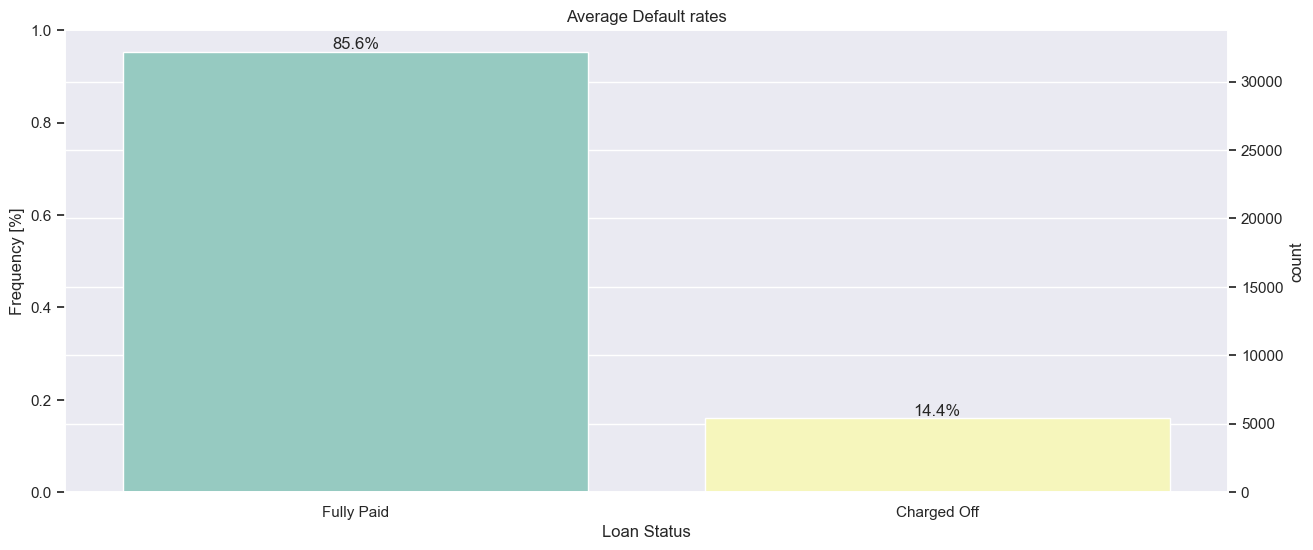

In [58]:
#Graph for average default and fully paid loans.
plt_function("loan_status",loans_data,'Loan Status','Average Default rates')

/var/folders/q_/xgf1500s6kn9v911pn002dgh0000gn/T/ipykernel_6426/2627148989.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3")


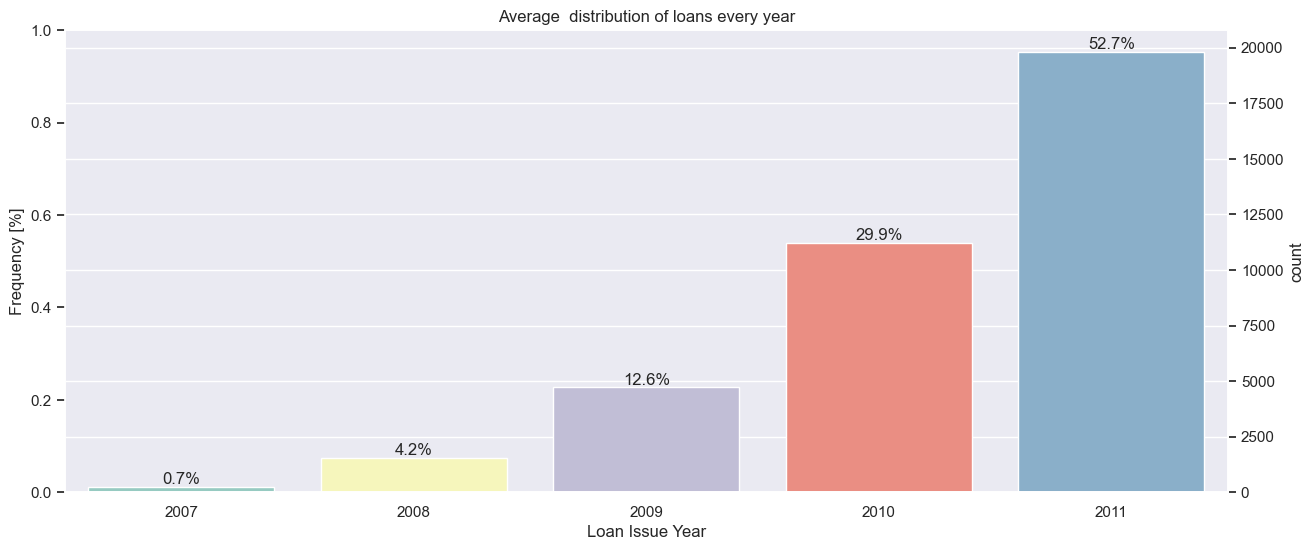

In [59]:
#Graph to understand the loans issued each year. This will give the trends of the loan.
plt_function("issue_year",loans_data,'Loan Issue Year','Average  distribution of loans every year')

/var/folders/q_/xgf1500s6kn9v911pn002dgh0000gn/T/ipykernel_6426/2627148989.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

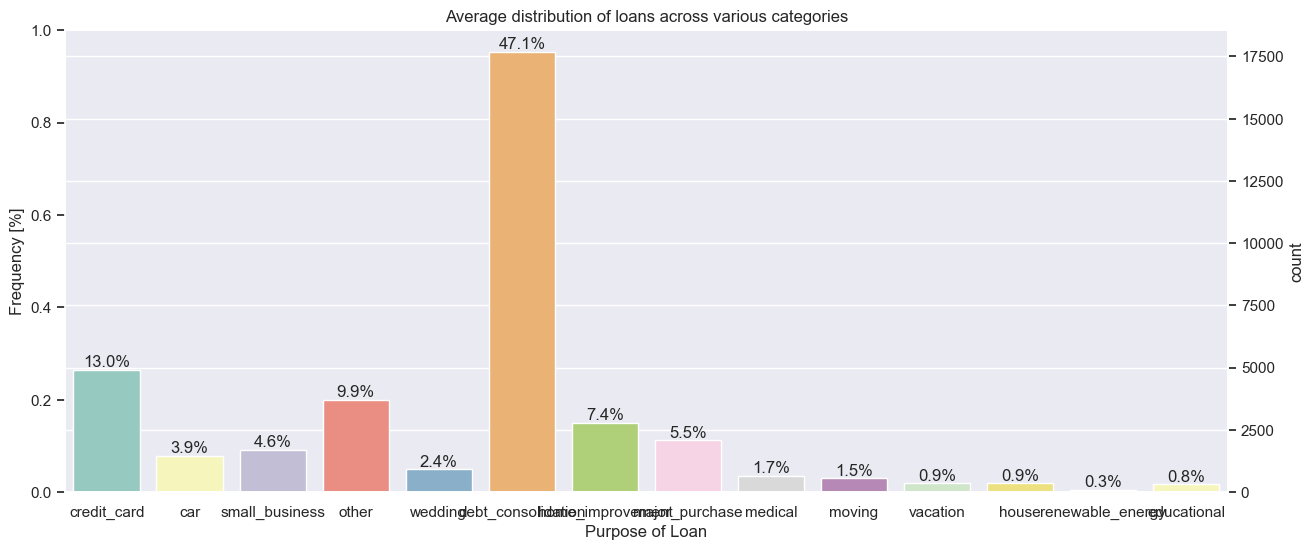

In [62]:
#Graph to understand the loan distribution based on Purpose of loan. 
#This will help to figure out which category need

plt_function("purpose",loans_data,'Purpose of Loan','Average distribution of loans across various categories')

plt.xticks(rotation=90)


/var/folders/q_/xgf1500s6kn9v911pn002dgh0000gn/T/ipykernel_6426/2627148989.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3")


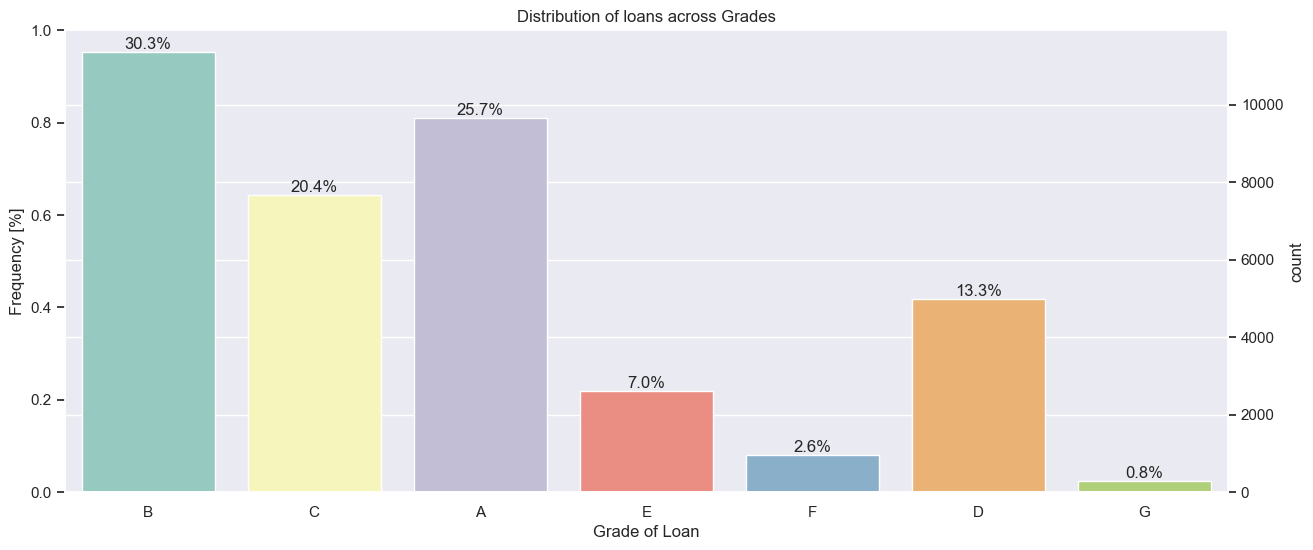

In [63]:
#Graph to show the distribution of loans across the grades.
plt_function("grade",loans_data,'Grade of Loan','Distribution of loans across Grades')


/var/folders/q_/xgf1500s6kn9v911pn002dgh0000gn/T/ipykernel_6426/2627148989.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3")


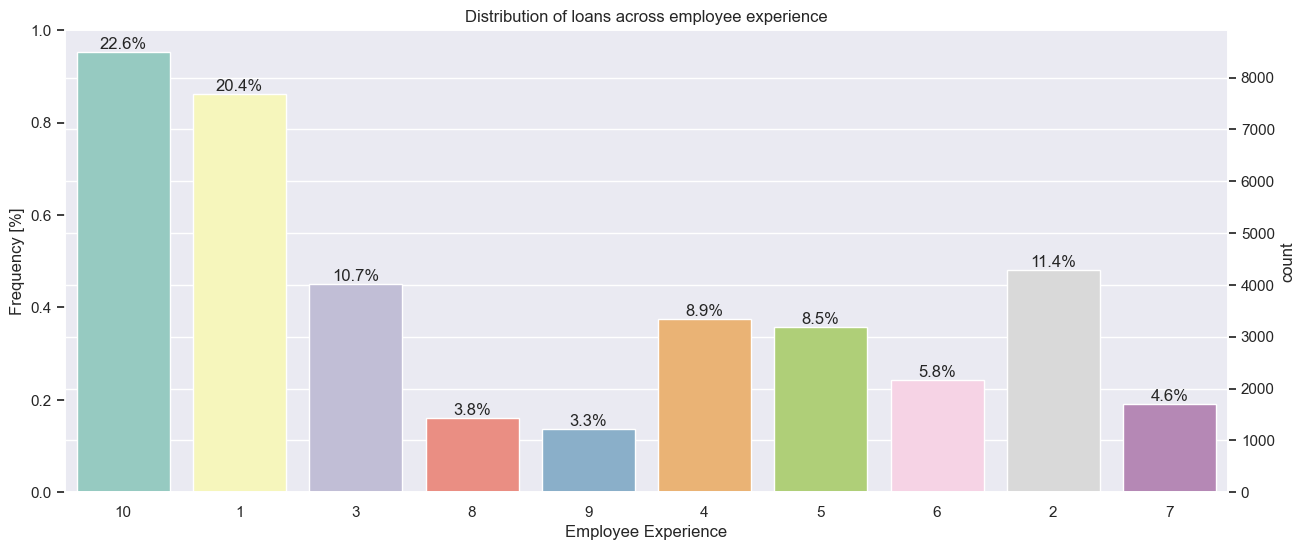

In [64]:
#Graphs to show the loan distribution across the Experience.
plt_function("emp_length",loans_data,'Employee Experience','Distribution of loans across employee experience')

Analysis:-
    average default rate across all categories is 14.4%
    The number of loan applicants is increasing every year, 2011 being the heighest.
    People with 1 year and 10 year experience are taking loans more frequently.
    Top 6 loan category:-
        debt_consolidation
        credit_card
        other
        home_improvement
        major_purchase
        small_business

In [65]:
#Filter only for above loan category
category_list = ['debt_consolidation','credit_card','other','home_improvement','major_purchase','small_business']
loans_data = loans_data.query('purpose == @category_list')

In [66]:
loans_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,l_to_an,issue_year
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.21,2011
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.20,2011
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.20,2011
5,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0.15,2011
7,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,4,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,CA,5.55,0.14,2011


More dti then high chance of default. dti>20 default probiblity high

In [67]:
def dti_range(dti):
    if dti <= 10.00:
        return 'low'
    elif (dti >10.00 and dti <= 20.00):
        return 'medium'
    else:
        return 'high'
        

More loan to income ratio, more the chnaces of default.

In [68]:
def loan_to_annual_income_range(l_to_an):
    if l_to_an <= 0.10:
        return 'low'
    elif (l_to_an >0.10 and l_to_an <= 0.20):
        return 'medium'
    else:
        return 'high'

Define years of experience category

In [69]:
def experience_level(exp):
    if exp <= 3:
        return 'Junior'
    elif (exp >3 and exp <= 7):
        return 'Senior'
    else:
        return 'Specialist'

In [70]:
loans_data['dti_range'] = loans_data['dti'].apply(lambda x : dti_range(x) )
loans_data['l_to_an_range'] = loans_data['l_to_an'].apply(lambda x : loan_to_annual_income_range(x) )
loans_data['exp_level'] = loans_data['emp_length'].apply(lambda x : experience_level(int(x)))
loans_data['int_rate_float'] = loans_data['int_rate'].apply(lambda x : float(x.replace('%','')))
loans_data['exp_level']

0        Specialist
2        Specialist
3        Specialist
5        Specialist
7            Senior
            ...    
37539        Senior
37540        Junior
37541        Junior
37542        Junior
37543        Junior
Name: exp_level, Length: 32862, dtype: object

Univariate segmented Analysis 

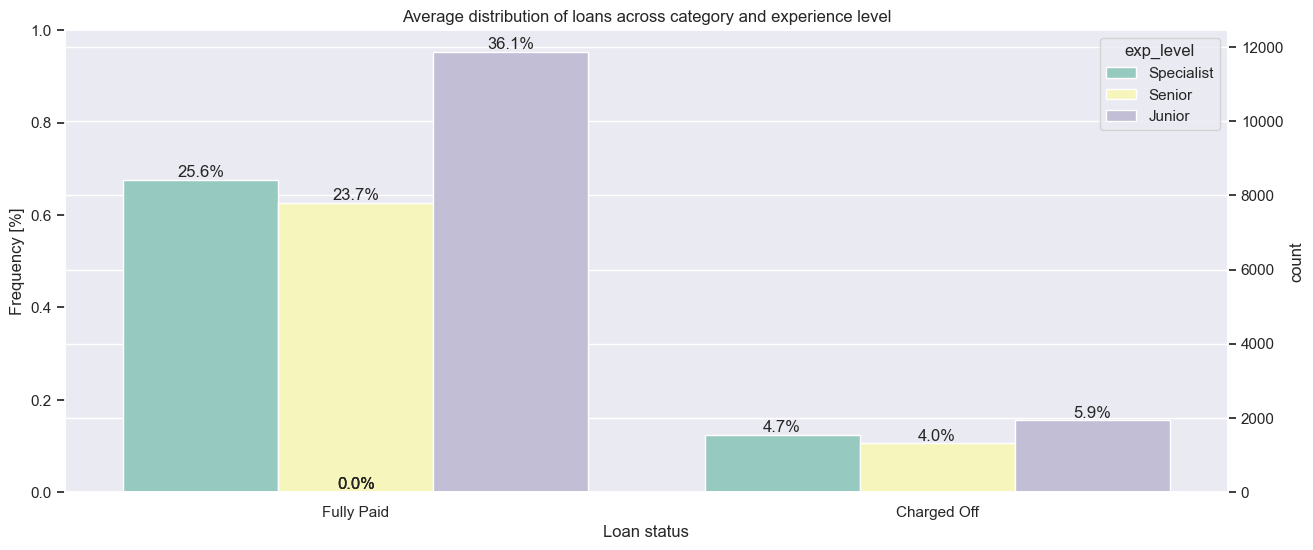

In [71]:
#Shows the loan status accross 3 level of experience
plt_function("loan_status",loans_data,'Loan status','Average distribution of loans across category and experience level','exp_level')


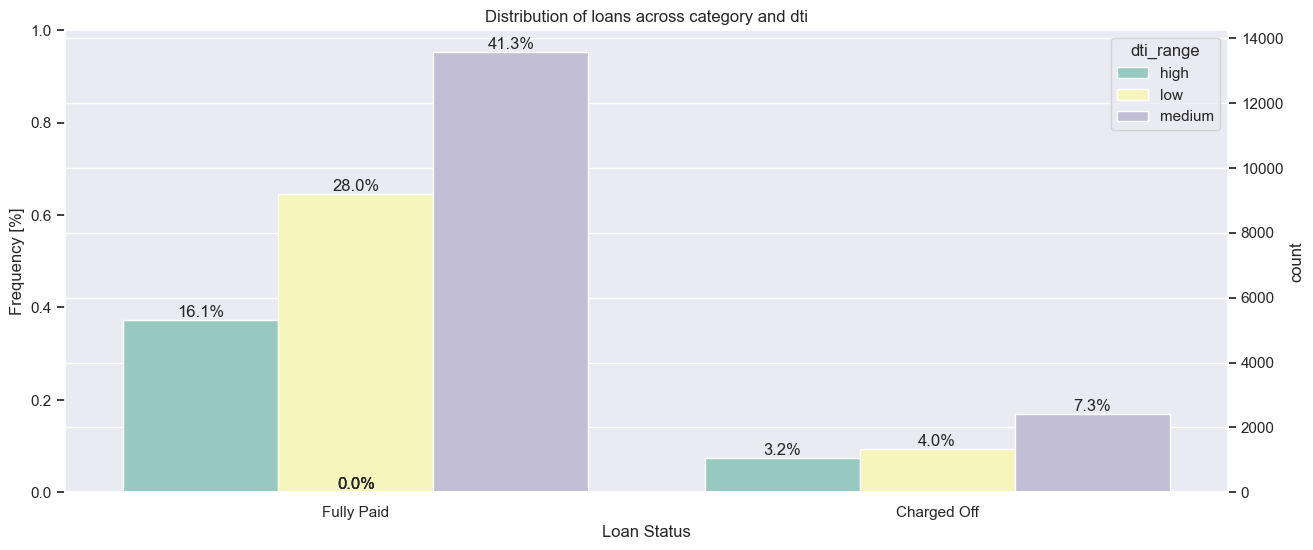

In [72]:
# Shows loan status for 3 level of dti range
plt_function("loan_status",loans_data,'Loan Status','Distribution of loans across category and dti','dti_range')


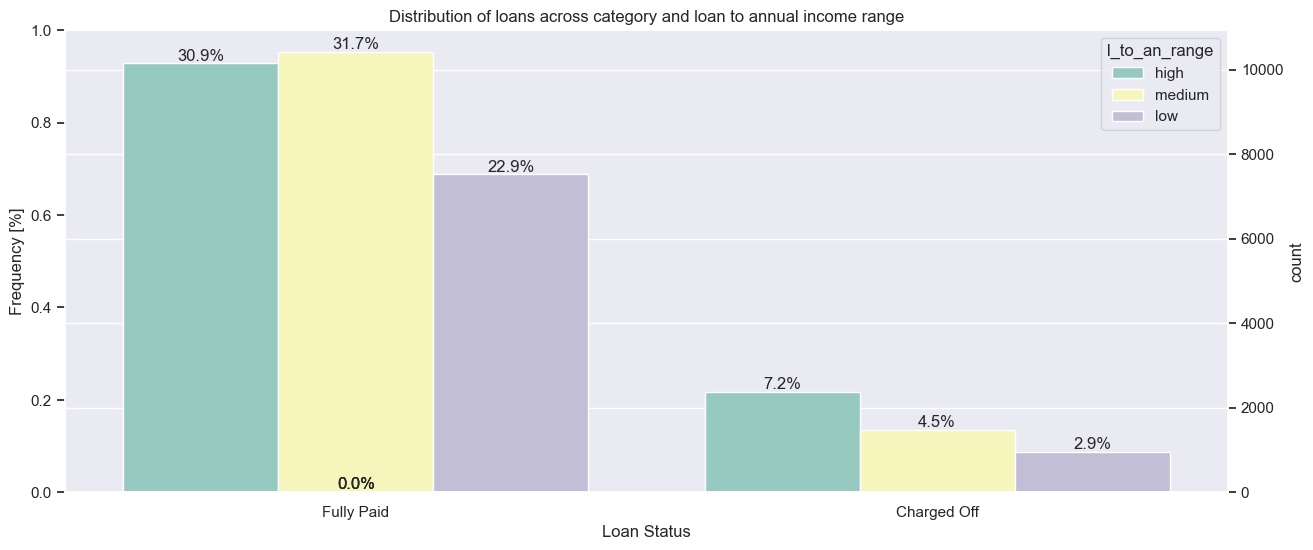

In [73]:
# Graph for loan status and 3 level of loan to income ratio.
plt_function("loan_status",loans_data,'Loan Status','Distribution of loans across category and loan to annual income range','l_to_an_range')


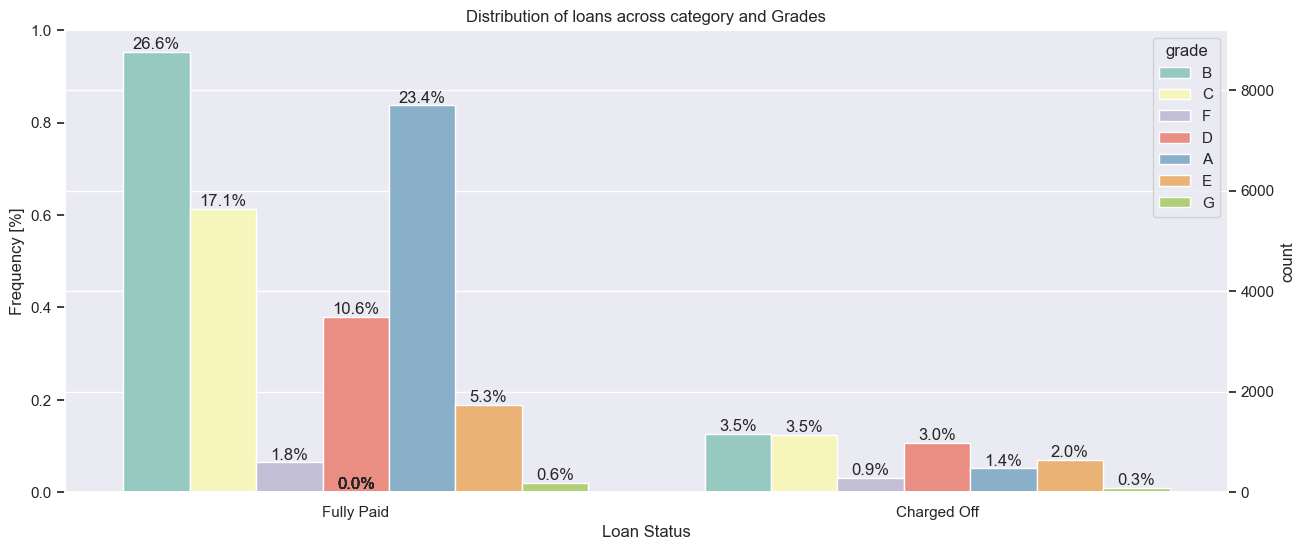

In [74]:
# Ghaph to show the loan status on Grades
plt_function("loan_status",loans_data,'Loan Status','Distribution of loans across category and Grades','grade')



Analysis :-
    people with less experience have high chance of default.
    People lying in medium dti range have high chances of default
    People who have high loan to annual income ratio are at high risk of defaulting.
    Grades B,Cand D are at high probablity of defaulting.
    

Bivariate Analysis - How house ownership and verified source of income affect  analysis.

Make verification_status as verified or not verified. If the value is verified or source verified then the column 
should have verified value. If the value is anything else then the column value should be not verified.

In [75]:
loans_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,l_to_an,issue_year,dti_range,l_to_an_range,exp_level,int_rate_float
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.21,2011,high,high,Specialist,10.65
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.20,2011,low,medium,Specialist,15.96
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.20,2011,medium,medium,Specialist,13.49
5,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0.15,2011,high,medium,Specialist,15.96
7,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,4,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,CA,5.55,0.14,2011,low,medium,Senior,21.28


In [104]:
loans_data['verification_status']= loans_data['verification_status'].apply(lambda x :'Verified' if (x=='Verified' or x == 'Source Verified')  else 'Not Verified')
loans_data.verification_status.value_counts()

verification_status
Verified        18795
Not Verified    14067
Name: count, dtype: int64

In [105]:

#configuration of subplot in a function.

def create_subplot(x_var,data_df,x_label,title,hue_var=None,palette_var='Dark2',rot_flag=0,axis=None):
    ncount = len(loans_data)
    if axis is None:
        axis= plt.gca()  
    bp = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette=palette_var,ax=axis)
    if(rot_flag==1):
        axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    axis.set_title(title)
    axis.set_xlabel(x_label)
    axis.set_ylabel('Frequency [%]')
    for p in axis.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        axis.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') 
    return bp

<Axes: title={'center': 'Distribution of Not Verified Source Income on Grades'}, xlabel='Loan Status', ylabel='Frequency [%]'>

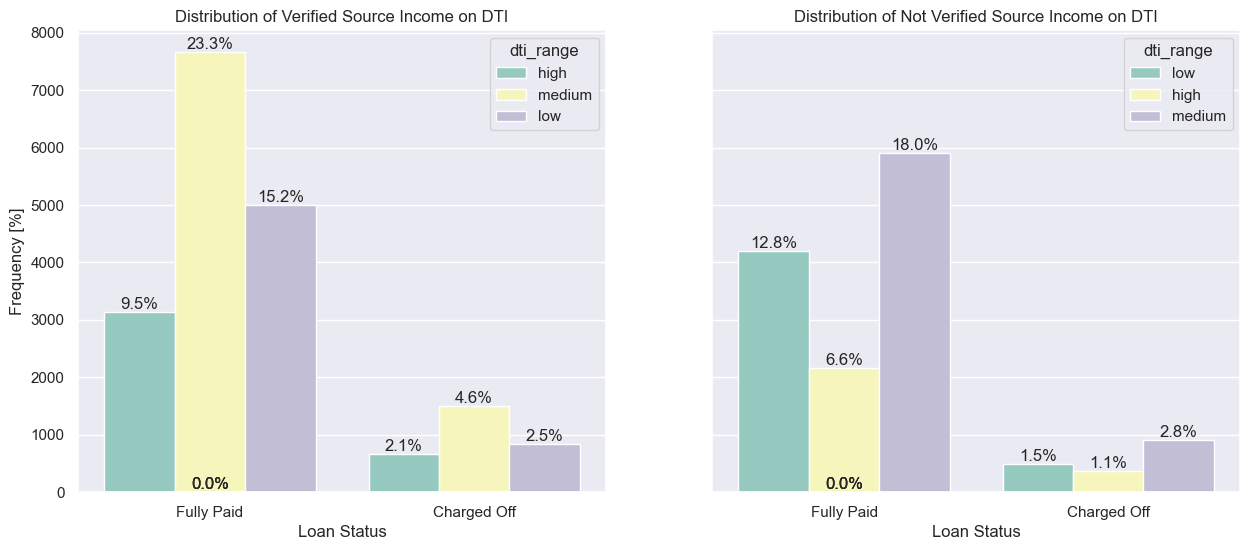

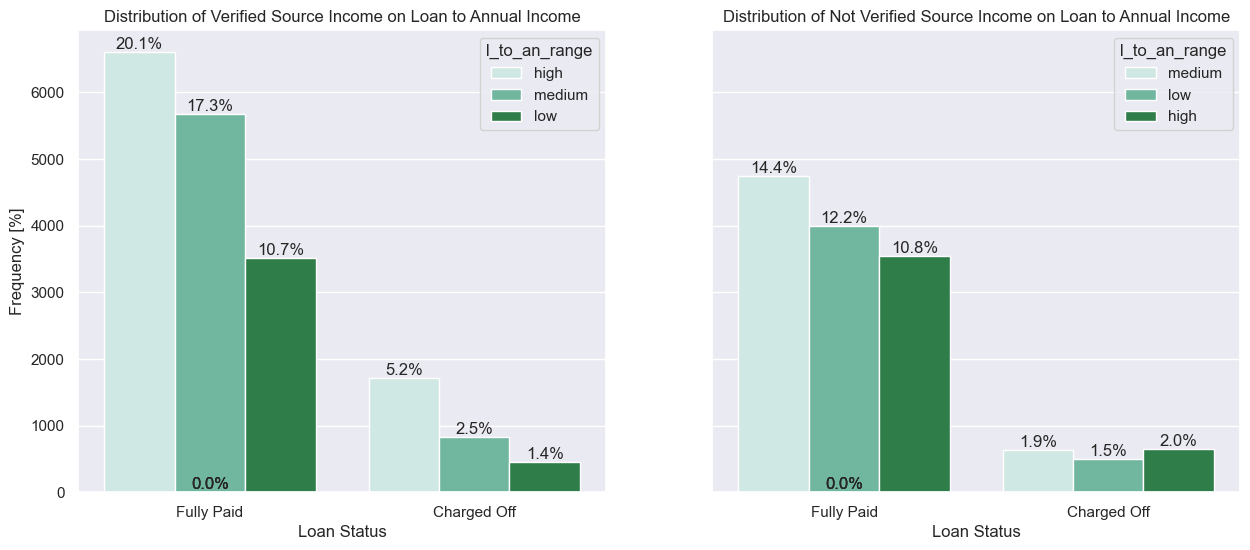

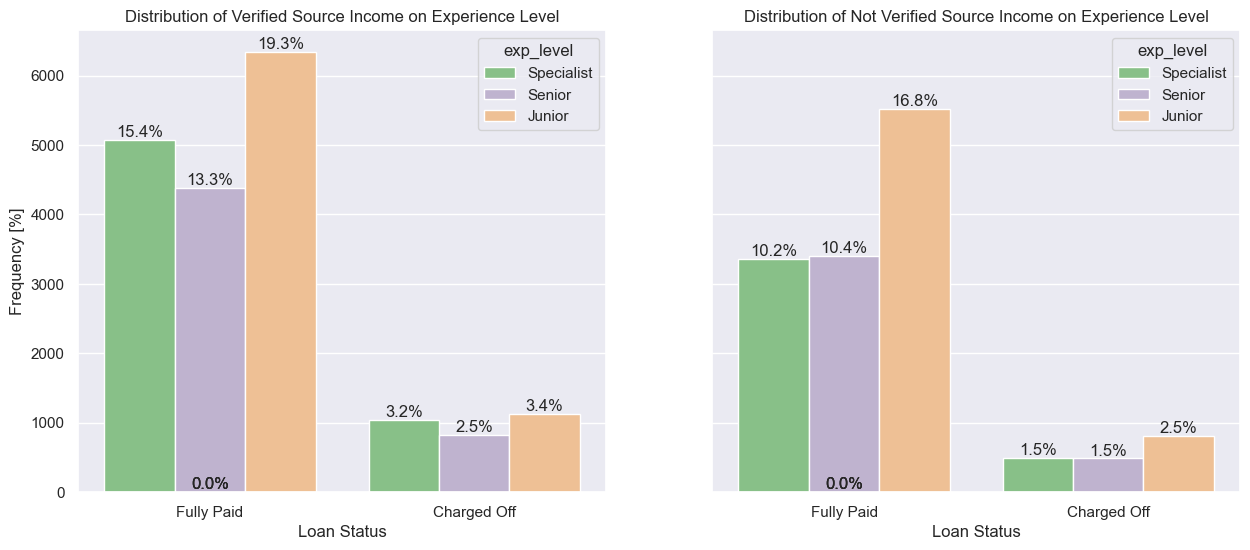

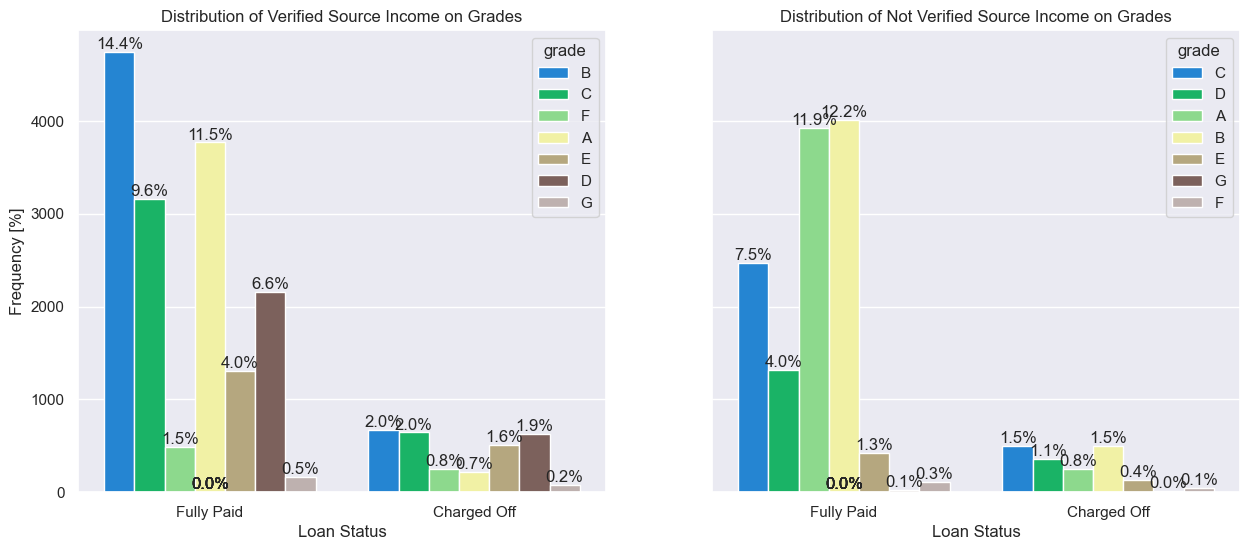

In [111]:
#Distribution of Verified and Not verified Source Income on DTI
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',loans_data[loans_data['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on DTI','dti_range','Set3',0, ax1)
create_subplot('loan_status',loans_data[loans_data['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on DTI','dti_range','Set3',0, ax2)

#Distribution of Verified and Not verified Source Income on Loan to Annual Income
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',loans_data[loans_data['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Loan to Annual Income','l_to_an_range','BuGn',0, ax1)
create_subplot('loan_status',loans_data[loans_data['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Loan to Annual Income','l_to_an_range','BuGn',0, ax2)   


#Distribution of Verified and not verified Source Income on Experience Level
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',loans_data[loans_data['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Experience Level','exp_level','Accent',0, ax1)
create_subplot('loan_status',loans_data[loans_data['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Experience Level','exp_level','Accent',0, ax2)   


#Distribution of Verified and not verified Source Income on Grades
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',loans_data[loans_data['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Grades','grade','terrain',0, ax1)
create_subplot('loan_status',loans_data[loans_data['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Grades','grade','terrain',0, ax2)

Effect of house ownership

<Axes: title={'center': 'Distribution of Owned Asset on Grades'}, xlabel='Loan Status', ylabel='Frequency [%]'>

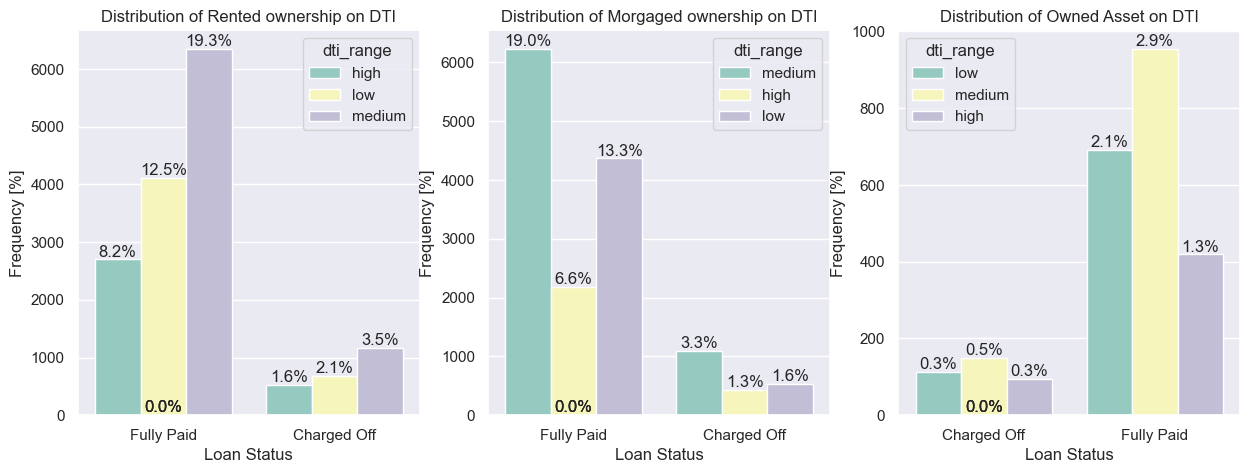

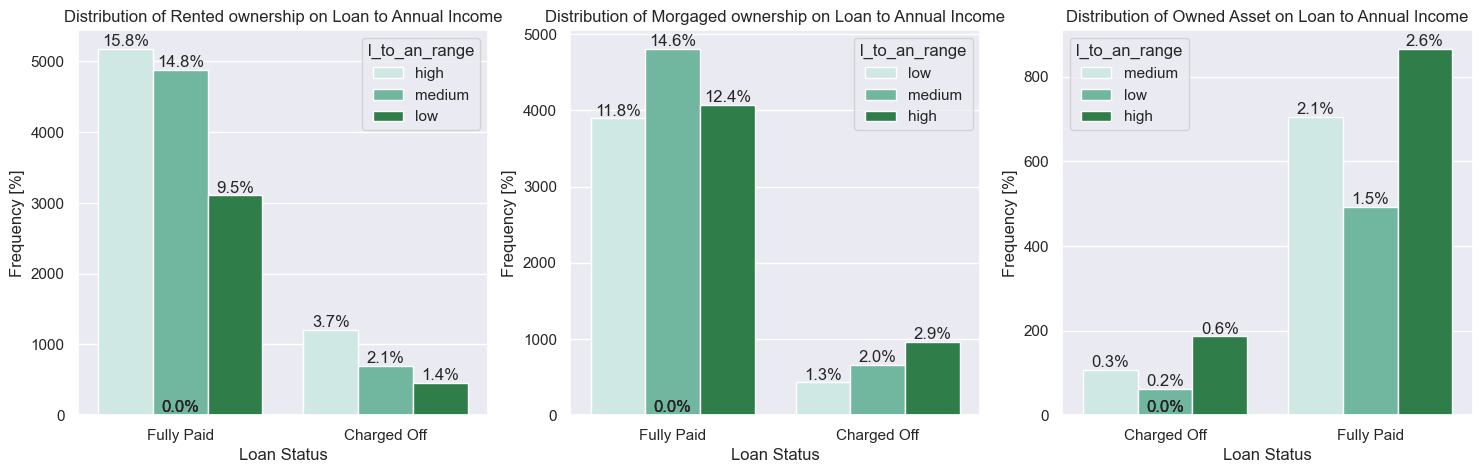

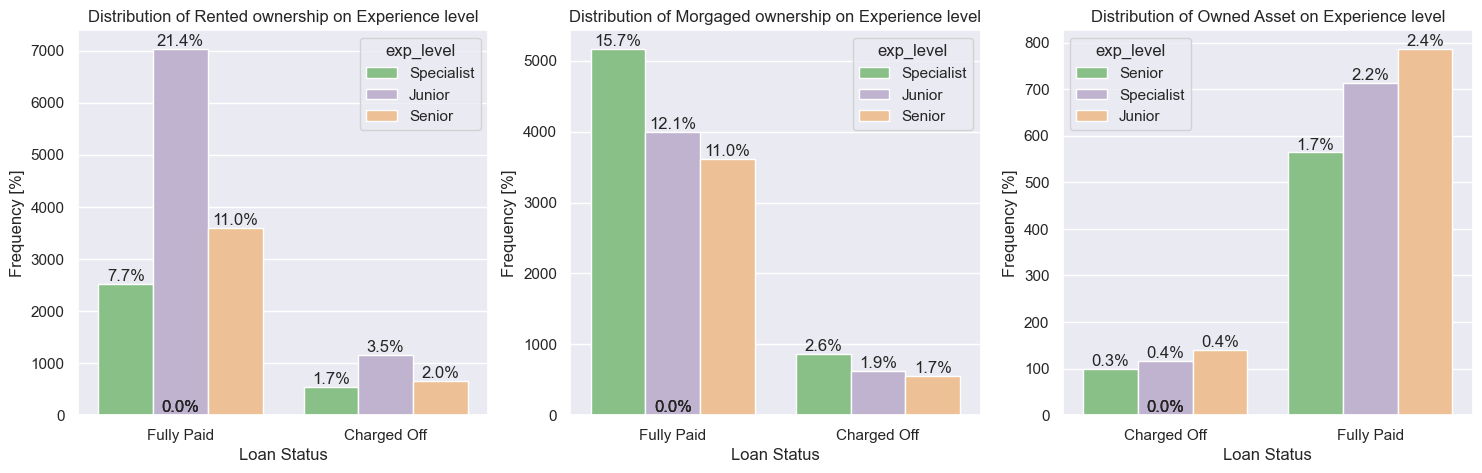

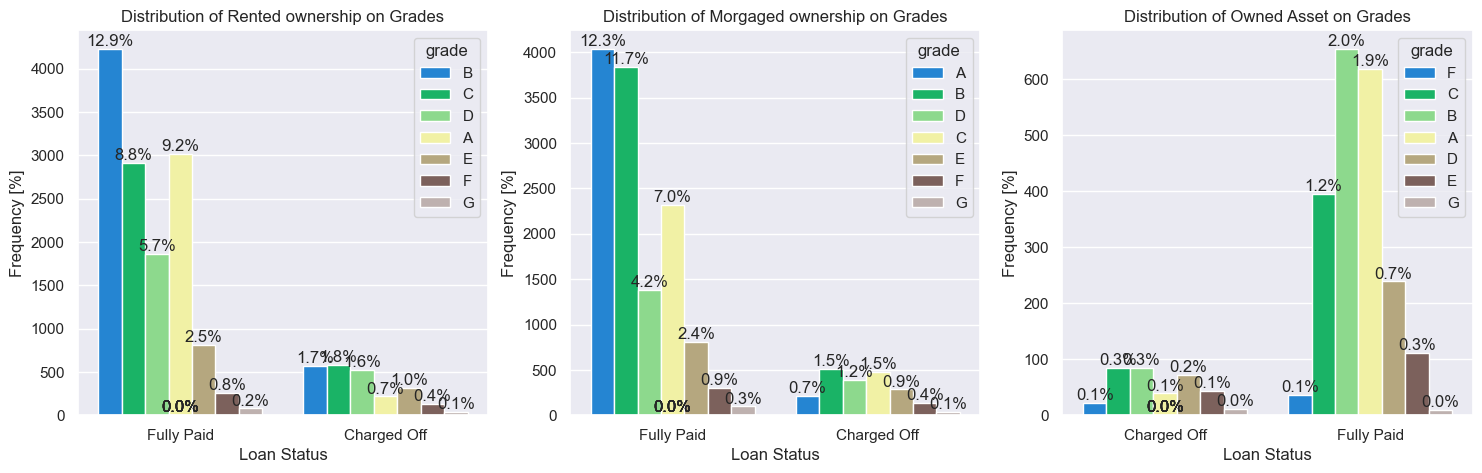

In [108]:
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
create_subplot('loan_status',loans_data[loans_data['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on DTI','dti_range','Set3',0, axs[0])
create_subplot('loan_status',loans_data[loans_data['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on DTI','dti_range','Set3',0, axs[1])   
create_subplot('loan_status',loans_data[loans_data['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on DTI','dti_range','Set3',0, axs[2])   


fig, axs = plt.subplots(ncols=3,figsize=(18,5))
create_subplot('loan_status',loans_data[loans_data['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Loan to Annual Income','l_to_an_range','BuGn',0, axs[0])
create_subplot('loan_status',loans_data[loans_data['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Loan to Annual Income','l_to_an_range','BuGn',0, axs[1])   
create_subplot('loan_status',loans_data[loans_data['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Loan to Annual Income','l_to_an_range','BuGn',0, axs[2])   

fig, axs = plt.subplots(ncols=3,figsize=(18,5))
create_subplot('loan_status',loans_data[loans_data['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Experience level','exp_level','Accent',0, axs[0])
create_subplot('loan_status',loans_data[loans_data['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Experience level','exp_level','Accent',0, axs[1])   
create_subplot('loan_status',loans_data[loans_data['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Experience level','exp_level','Accent',0, axs[2])   

fig, axs = plt.subplots(ncols=3,figsize=(18,5))
create_subplot('loan_status',loans_data[loans_data['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Grades','grade','terrain',0, axs[0])
create_subplot('loan_status',loans_data[loans_data['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Grades','grade','terrain',0, axs[1])   
create_subplot('loan_status',loans_data[loans_data['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Grades','grade','terrain',0, axs[2])   

how variables are corelated to each other

In [109]:
laons_corr_df = loans_data.filter(["loan_amnt", "funded_amnt", "funded_amnt_inv",'int_rate_float','installment','emp_length','annual_inc','dti','l_to_an']) 
cor = laons_corr_df.corr()
round(cor, 3)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate_float,installment,emp_length,annual_inc,dti,l_to_an
loan_amnt,1.000,0.981,0.935,0.306,0.928,0.151,0.258,0.057,0.601
funded_amnt,0.981,1.000,0.954,0.310,0.956,0.151,0.253,0.058,0.588
funded_amnt_inv,0.935,0.954,1.000,0.302,0.901,0.161,0.240,0.067,0.557
int_rate_float,0.306,0.310,0.302,1.000,0.280,0.004,0.048,0.110,0.210
installment,0.928,0.956,0.901,0.280,1.000,0.123,0.256,0.046,0.538
emp_length,0.151,0.151,0.161,0.004,0.123,1.000,0.105,0.044,0.001
annual_inc,0.258,0.253,0.240,0.048,0.256,0.105,1.000,-0.132,-0.234
dti,0.057,0.058,0.067,0.110,0.046,0.044,-0.132,1.000,0.158
l_to_an,0.601,0.588,0.557,0.210,0.538,0.001,-0.234,0.158,1.000


Analysis:-
    average default rate across all categories is 14.4%.
    The number of loan applicants is increasing every year, 2011 being the heighest. 
    People with 1 year and 10 year experience are taking loans more frequently. 
    Top 6 loan category:- debt_consolidation credit_card other home_improvement major_purchase small_business
    People with less experience have high chance of default.
    People lying in medium dti range have high chances of default
    People who have high loan to annual income ratio are at high risk of defaulting.
    Grades B,Cand D are at high probablity of defaulting.
    For verified source of income. High loan to income ratio has highest probability of defaulting.
    For verified and not verified source of income. The Junior experience level are more towards defaulting.
    For rented and house owner. More the loan to income ratio, more the chances of defaulting.